<a href="https://colab.research.google.com/github/monokrrome/OIBSIP/blob/main/Data_Cleaning_OIBSIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[DATASET](https://www.kaggle.com/datasets/datasnaek/youtube)

### **Loading Dataset and Displaying Basic Information**

In [ ]:
import pandas as pd

# Load the dataset, handling potential errors
try:
    df = pd.read_csv('USvideos.csv')
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")
    # Try reading the file with a different error handling strategy
    df = pd.read_csv('USvideos.csv', on_bad_lines='skip')  # Skip lines with errors
    print("CSV loaded with errors skipped.")

# Display basic information about the dataset
print(df.info())

# Check for any inconsistencies or anomalies in data types
print(df.dtypes)

print(df.head() )

print(df.describe())

Error reading CSV: Error tokenizing data. C error: Expected 11 fields in line 2401, saw 21

CSV loaded with errors skipped.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7992 entries, 0 to 7991
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        7992 non-null   object 
 1   title           7992 non-null   object 
 2   channel_title   7992 non-null   object 
 3   category_id     7992 non-null   int64  
 4   tags            7992 non-null   object 
 5   views           7992 non-null   int64  
 6   likes           7992 non-null   int64  
 7   dislikes        7992 non-null   int64  
 8   comment_total   7992 non-null   int64  
 9   thumbnail_link  7992 non-null   object 
 10  date            7992 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 686.9+ KB
None
video_id           object
title              object
channel_title      object
category_id         int64
tags       

### **Missing Data Handling**

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handling missing values
# For simplicity, we can drop rows with missing values (if any)
df = df.dropna()

video_id          0
title             0
channel_title     0
category_id       0
tags              0
views             0
likes             0
dislikes          0
comment_total     0
thumbnail_link    0
date              0
dtype: int64


### **Duplicate Removal**

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')

# Remove duplicate rows
df = df.drop_duplicates()

Duplicates: 0


### **Standardization**

In [ ]:
# Convert date to a standard date format
df['date'] = pd.to_datetime(df['date'])

# Ensure column names are in a consistent format (e.g., all lowercase)
df.columns = [col.lower() for col in df.columns]

# Check for any inconsistent categorical data in 'category_id'
print(df['category_id'].unique())

# Convert 'category_id' to a categorical data type
df['category_id'] = df['category_id'].astype('category')

[24 28 22 23  1 26 10 25 17 27  2 20 15 29 19 43]


### **Outlier Detection**

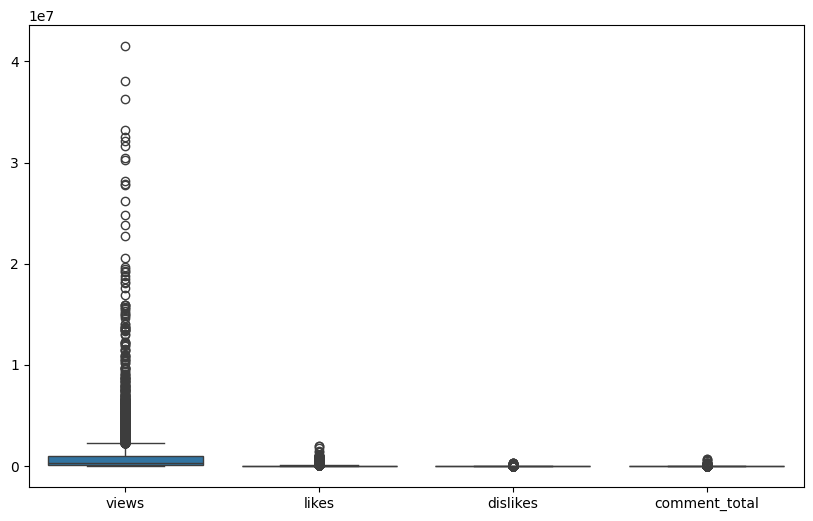

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot to identify outliers in numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['views', 'likes', 'dislikes', 'comment_total']])
plt.show()

# Addressing outliers: For simplicity, we can use the IQR method to remove them
Q1 = df[['views', 'likes', 'dislikes', 'comment_total']].quantile(0.25)
Q3 = df[['views', 'likes', 'dislikes', 'comment_total']].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((df[['views', 'likes', 'dislikes', 'comment_total']] < (Q1 - 1.5 * IQR)) |
          (df[['views', 'likes', 'dislikes', 'comment_total']] > (Q3 + 1.5 * IQR))).any(axis=1)]